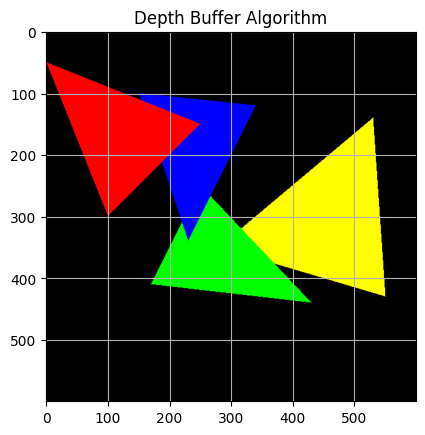

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())

#simple primitive class to represent triangles
class Primitive:
    def __init__(self, vertices, color):
        self.vertices = vertices
        self.color = color

# Check if a point (x, y) is inside a triangle defined by its vertices
def is_pixel_inside_triangle(x, y, v0, v1, v2):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign((x, y), v0, v1) < 0.0
    b2 = sign((x, y), v1, v2) < 0.0
    b3 = sign((x, y), v2, v0) < 0.0

    return (b1 == b2 == b3)

# Calculate the depth (z-coordinate) of a point (x, y) in a triangle
def calculate_depth(x, y, v0, v1, v2):
    a = (v1[1] - v2[1]) * (x - v2[0]) + (v2[0] - v1[0]) * (y - v2[1])
    b = (v2[1] - v0[1]) * (x - v2[0]) + (v0[0] - v2[0]) * (y - v2[1])
    c = -((x - v2[0]) * (v0[1] - v1[1]) - (v0[0] - v1[0]) * (y - v2[1]))

    total_area = (v1[1] - v2[1]) * (v0[0] - v2[0]) + (v2[0] - v1[0]) * (v0[1] - v2[1])

    alpha = a / total_area
    beta = b / total_area
    gamma = c / total_area

    return alpha * v0[2] + beta * v1[2] + gamma * v2[2]


def depth_buffer_method(primitives, width, height):
    color_buffer = np.zeros((height, width, 3)) 
    depth_buffer = np.full((height, width), 255, dtype=np.uint8) 

    for primitive in primitives:
        v0, v1, v2 = primitive.vertices
        color = primitive.color

        for x in range(width):
            for y in range(height):
                if is_pixel_inside_triangle(x, y, v0, v1, v2):
                    depth = calculate_depth(x, y, v0, v1, v2)
                    if depth < depth_buffer[y, x]:
                        depth_buffer[y, x] = depth
                        color_buffer[y, x] = color

    return color_buffer

# Main function

primitives = [
    Primitive([(150, 100, 1), (230, 340, 2), (340, 120, 3)], (0, 0, 1)), 
    Primitive([(250, 250, 4), (430, 440, 5), (170, 410, 6)], (0, 1, 0)),  
    Primitive([(280, 350, 7), (530, 140, 8), (550, 430, 9)], (1, 1, 0)),  
    Primitive([(0, 50, 7), (100, 300, 8), (250, 150, 0)], (1, 0, 0))  
]
width, height = 600, 600
rendered_image = depth_buffer_method(primitives, width, height)

plt.imshow(rendered_image)
plt.grid()
plt.title('Depth Buffer Method')
plt.show()
